In [ ]:
# this is part of the preliminary models that we are testing, a proof of concept
# autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, num_dim, latent_dim=2):
        super().__init__()
        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(num_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            # latent space
            nn.Linear(64, latent_dim)
        )
        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            # reconstruct original features
            nn.Linear(256, num_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        recon = self.decoder(z)
        return recon, z

# equal to number of columns/features
num_dim = X_norm.shape[1]
model = Autoencoder(num_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# training and printing loss
model.train()
n_epochs = 30
for epoch in range(n_epochs):
    epoch_loss = 0.0
    for x_batch in loader:
        recon, _ = model(x_batch)
        loss = criterion(recon, x_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(loader):.6f}")

In [ ]:
# reconstruction with normal and abnormal plans
model.eval()
with torch.no_grad():
    recon_norm, z_norm = model(X_norm)
    errors_norm = torch.mean((X_norm - recon_norm)**2, dim=1)
    recon_ab, z_ab = model(X_ab)
    errors_ab = torch.mean((X_ab - recon_ab)**2, dim=1)

print("\nNormal and Abnormal Plans Reconstruction Error:")
print("Normal mean r-error:", float(errors_norm.mean()))
print("Abnormal mean r-error:", float(errors_ab.mean()))


Normal and Abnormal Plans Reconstruction Error:
Normal mean r-error: 0.24217621982097626
Abnormal mean r-error: 83.89197540283203


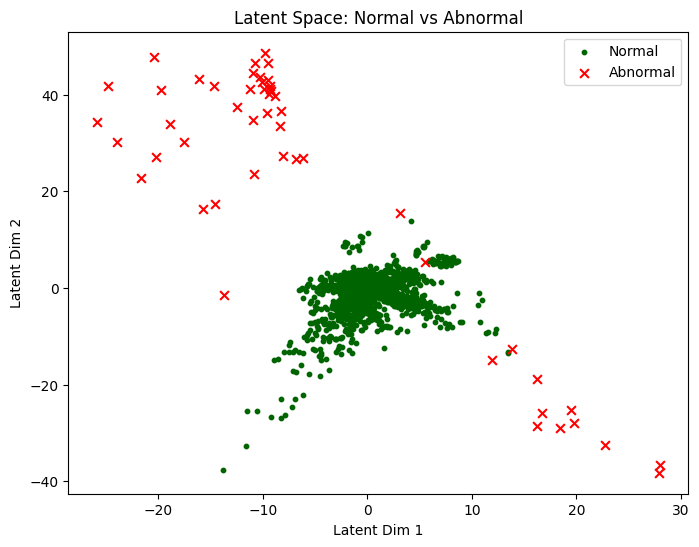

In [ ]:
# 2d latent space visualization
plt.figure(figsize=(8,6))
plt.scatter(z_norm[:,0].numpy(), z_norm[:,1].numpy(), c="darkgreen", s=10, label="Normal")
plt.scatter(z_ab[:,0].numpy(), z_ab[:,1].numpy(), c="red", s=40, marker="x", label="Abnormal")
plt.title("Latent Space: Normal vs Abnormal")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.legend()
plt.show()